Librerias Utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd 
from urllib.request import urlopen
from numpy import mean
warnings.filterwarnings('ignore')

# Accidentes en barranquilla

Descripción general de la base de datos
La base de datos contiene información sobre los incidentes de accidentalidad en la ciudad de Barranquilla, Colombia.

**FECHA_ACCIDENTE**: Fecha del accidente.

**HORA_ACCIDENTE**: Hora en que ocurrio el accidente.

**GRAVEDAD_ACCIDENTE**: Gravedad del accidente.

**CLASE_ACCIDENTE**: Tipo de accidente.

**SITIO_EXACTO_ACCIDENTE**: Lugar donde ocurrio el accidente.

**CANT_HERIDOS_EN _SITIO_ACCIDENTE**: Cantidad de heridos.

**CANT_MUERTOS_EN _SITIO_ACCIDENTE**: Cantidad de muertos.

**CANTIDAD_ACCIDENTES**: Cantidad de accidentes.

**AÑO_ACCIDENTE**: Año.

**MES_ACCIDENTE**: Mes.

**DIA_ACCIDENTE** : Dia.

# Base de datos

In [2]:
Accidentes = pd.read_csv("Accidentalidad_en_Barranquilla_20240901.csv", 
                         dtype={'CANT_HERIDOS_EN _SITIO_ACCIDENTE': 'float', 
                                'CANT_MUERTOS_EN _SITIO_ACCIDENTE': 'float', 
                                'CANTIDAD_ACCIDENTES': 'float', 
                                'AÑO_ACCIDENTE': 'str'})
display(Accidentes.head(10).style.set_caption("Base de datos: Precio del combustible en Colombia durante el 2023"))

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.000000,nan,1.000000,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,nan,nan,1.000000,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,nan,nan,1.000000,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,nan,nan,1.000000,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,nan,nan,1.000000,2018,January,Mon
5,2018-01-01T00:00:00.000,06:00:00:pm,Con heridos,Choque,CR 8 CL 41,3.000000,nan,1.000000,2018,January,Mon
6,2018-01-01T00:00:00.000,12:50:00:am,Con heridos,Atropello,CLLE 119B CRA 11B,1.000000,nan,1.000000,2018,January,Mon
7,2018-01-02T00:00:00.000,02:30:00:pm,Solo daños,Choque,CARRERA 25 37-42,nan,nan,1.000000,2018,January,Tue
8,2018-01-02T00:00:00.000,03:00:00:pm,Solo daños,Choque,CR 51B 1D 35,nan,nan,1.000000,2018,January,Tue
9,2018-01-02T00:00:00.000,03:45:00:pm,Solo daños,Choque,VIA 40 CLLE 85,nan,nan,1.000000,2018,January,Tue


Mostrar dimensiones

In [3]:
print(Accidentes.shape)

(25610, 11)


Las variables son:

In [4]:
print(Accidentes.columns)

Index(['FECHA_ACCIDENTE', 'HORA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE',
       'CLASE_ACCIDENTE', 'SITIO_EXACTO_ACCIDENTE',
       'CANT_HERIDOS_EN _SITIO_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE',
       'CANTIDAD_ACCIDENTES', 'AÑO_ACCIDENTE', 'MES_ACCIDENTE',
       'DIA_ACCIDENTE'],
      dtype='object')


# Descripción de variables

## Variables categóricas


In [5]:
print(Accidentes.select_dtypes(include=['object']).describe())

                FECHA_ACCIDENTE HORA_ACCIDENTE GRAVEDAD_ACCIDENTE  \
count                     25610          25610              25610   
unique                     2357            871                  3   
top     2018-06-08T00:00:00.000    04:00:00:pm         Solo daños   
freq                         34            408              15457   

       CLASE_ACCIDENTE SITIO_EXACTO_ACCIDENTE AÑO_ACCIDENTE MES_ACCIDENTE  \
count            25610                  25610         25610         25610   
unique               6                  15365             7            12   
top             Choque           CL 110 CR 9G          2018      February   
freq             23819                     77          5898          2477   

       DIA_ACCIDENTE  
count          25610  
unique             7  
top              Tue  
freq            4009  


GRAVEDAD_ACCIDENTE
Solo daños     15457
Con heridos     9901
Con muertos      252
Name: count, dtype: int64


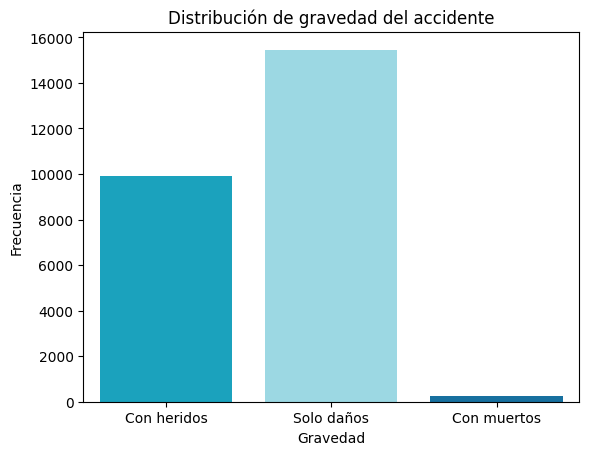

In [6]:
# Gravedad de accidentes
gravedad_counts = Accidentes['GRAVEDAD_ACCIDENTE'].value_counts()
print(gravedad_counts)

sns.countplot(data=Accidentes, x='GRAVEDAD_ACCIDENTE', palette=["#00b4d8", "#90e0ef", "#0077b6"])
plt.title("Distribución de gravedad del accidente")
plt.xlabel("Gravedad")
plt.ylabel("Frecuencia")
plt.show()

Se observa que la mayoría de los accidentes no hubo consecuencias graves, en la mayoría de los casos solo se reportaron daños materiales. 

CLASE_ACCIDENTE
Choque            23819
Atropello          1344
Caida Ocupante      194
Otro                123
Volcamiento         117
Incendio             13
Name: count, dtype: int64


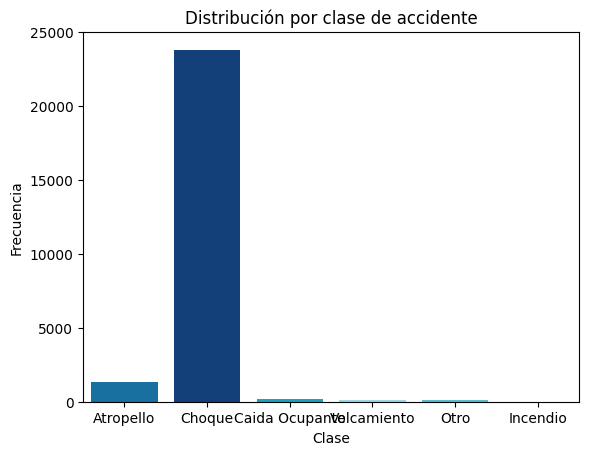

In [7]:
# Clase de accidente
clase_counts = Accidentes['CLASE_ACCIDENTE'].value_counts()
print(clase_counts)

sns.countplot(data=Accidentes, x='CLASE_ACCIDENTE', palette=[ "#0077b6","#023e8a","#00b4d8" , "#90e0ef", "#48cae4", "#48cae4"])
plt.title("Distribución por clase de accidente")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

La mayor cantidad de accidentes son consecuencias de Choques,seguido por el Atropello y el resto de las clases de accidentes se distribuye casi de manera proporcionalmente baja.

AÑO_ACCIDENTE
2018    5898
2019    5645
2021    4700
2022    3683
2020    3281
2023    1662
2024     741
Name: count, dtype: int64


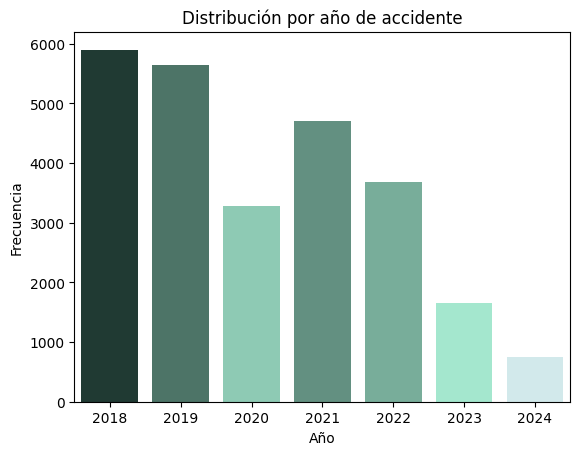

In [8]:
# Año de accidente
año_counts = Accidentes['AÑO_ACCIDENTE'].value_counts()
print(año_counts)

sns.countplot(data=Accidentes, x='AÑO_ACCIDENTE', palette=["#1c3e35", "#467a69", "#84d4b7", "#5b9883", "#6fb69d", "#99f2d1", "#ceedef"])
plt.title("Distribución por año de accidente")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()

Desde el año 2018 hasta el año actual ha disminuido la ocurrencia de accidentes de manera significativa.

MES_ACCIDENTE
February     2477
March        2446
January      2349
December     2189
May          2121
June         2103
October      2090
April        2010
November     1995
September    1980
July         1932
August       1918
Name: count, dtype: int64


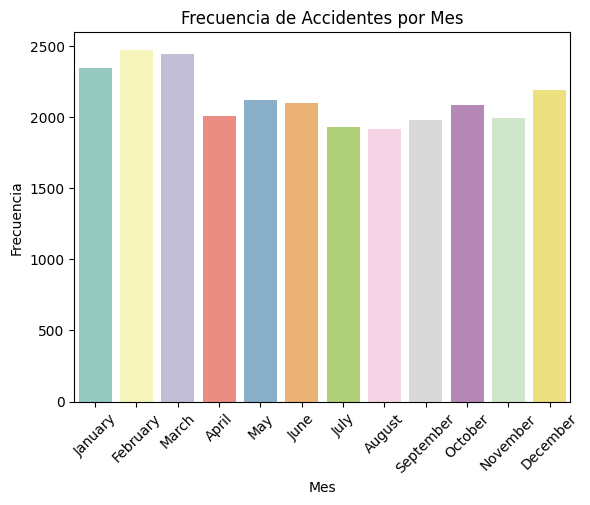

In [9]:
# Frecuencia por mes
mes_counts = Accidentes['MES_ACCIDENTE'].value_counts()
print(mes_counts)

# Ordenar los meses
orden_meses = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
Accidentes['MES_ACCIDENTE'] = pd.Categorical(Accidentes['MES_ACCIDENTE'], categories=orden_meses, ordered=True)

# Gráfico de frecuencia por mes
sns.countplot(data=Accidentes, x='MES_ACCIDENTE', palette="Set3")
plt.title("Frecuencia de Accidentes por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


## Variables Numéricas

       CANT_HERIDOS_EN _SITIO_ACCIDENTE  CANT_MUERTOS_EN _SITIO_ACCIDENTE  \
count                       9984.000000                        252.000000   
mean                           1.471655                          1.035714   
std                            1.156751                          0.185946   
min                            1.000000                          1.000000   
25%                            1.000000                          1.000000   
50%                            1.000000                          1.000000   
75%                            2.000000                          1.000000   
max                           42.000000                          2.000000   

       CANTIDAD_ACCIDENTES  
count         25610.000000  
mean              1.000195  
std               0.013972  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               2.000000  


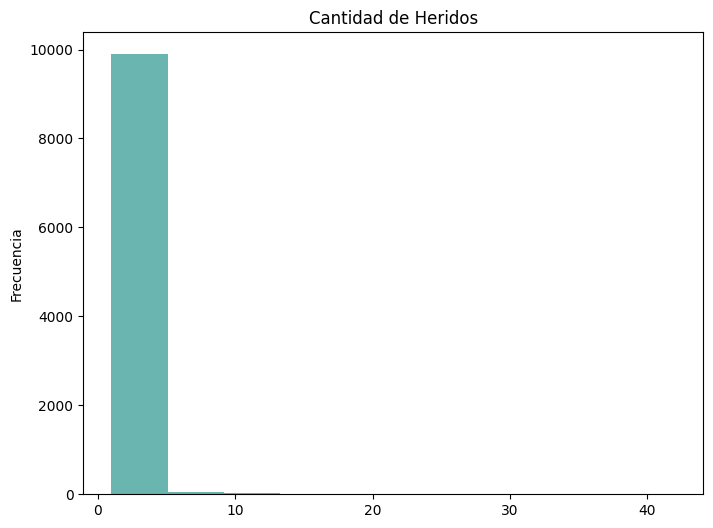

In [10]:


# Descripción de variables numéricas
print(Accidentes.describe())



plt.figure(figsize=(8, 6))
plt.hist(Accidentes['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].dropna(), bins=10, color="#6ab5b0")
plt.title("Cantidad de Heridos")
plt.ylabel('Frecuencia')
plt.show()

plt.show()



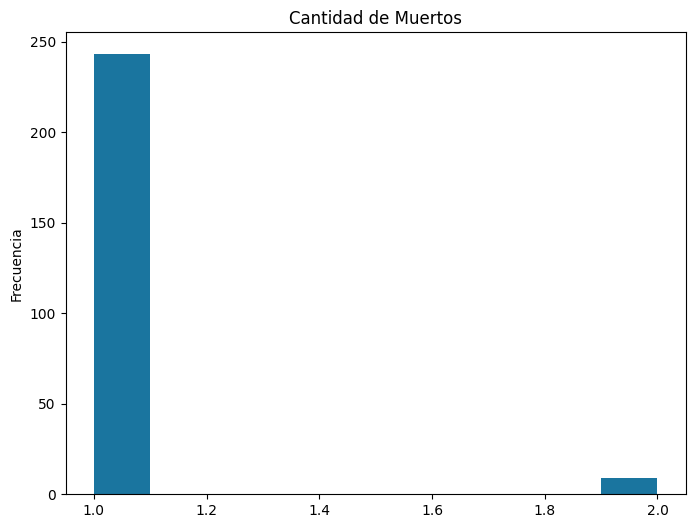

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(Accidentes['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].dropna(), bins=10, color="#1a759f")
plt.title("Cantidad de Muertos")
plt.ylabel('Frecuencia')
plt.show()

plt.show()

# Análisis de subconjuntos de la base de datos


1. **Accidentes ocurridos el primer trimestre de cada año con muertos**

Se usaran las variales ‘AÑO_ACCIDENTE’, ‘MES_ACCIDENTE’ y ‘GRAVEDAD_ACCIDENTE’

In [12]:
# Filtro 1
filtro1 = Accidentes[(Accidentes['MES_ACCIDENTE'].isin(["January", "February", "March"])) & 
                     (Accidentes['GRAVEDAD_ACCIDENTE'] == "Con muertos")]

print(filtro1['AÑO_ACCIDENTE'].value_counts().rename_axis('AÑO ACCIDENTE').reset_index(name='Frecuencia'))
print(filtro1['CLASE_ACCIDENTE'].value_counts().rename_axis('CLASE DE ACCIDENTE').reset_index(name='Frecuencia'))


  AÑO ACCIDENTE  Frecuencia
0          2022          20
1          2018          11
2          2023          10
3          2020           9
4          2019           9
5          2024           7
6          2021           6
  CLASE DE ACCIDENTE  Frecuencia
0             Choque          48
1          Atropello          19
2               Otro           3
3        Volcamiento           2


En los primeros tres meses del año (enero, febrero y marzo), se han registrado un total de 64 accidentes con víctimas fatales entre 2018 y 2024. El año 2022 fue el más crítico, con 20 accidentes fatales, mientras que el año 2024 mostró una disminución a 7 casos. La mayoría de estos accidentes fueron choques (48 casos), seguidos por atropellos (19 casos), otros tipos de accidentes (3 casos), y volcamientos (2 casos).

2. **Accidentes ocurridos por un choque y sin muertos**

Se usaran las variales ‘CLASE_ACCIDENTE’ y ‘GRAVEDAD_ACCIDENTE’

In [13]:
# Filtro 2
filtro2 = Accidentes[(Accidentes['GRAVEDAD_ACCIDENTE'].isin(["Sin muertos", "Solo daños"])) & 
                     (Accidentes['CLASE_ACCIDENTE'] == "Choque")]

print(filtro2['AÑO_ACCIDENTE'].value_counts().rename_axis('AÑO ACCIDENTE').reset_index(name='Frecuencia'))
print(filtro2['MES_ACCIDENTE'].value_counts().rename_axis('MES ACCIDENTE').reset_index(name='Frecuencia'))

  AÑO ACCIDENTE  Frecuencia
0          2018        4111
1          2019        4000
2          2021        3224
3          2020        2165
4          2022        1878
5          2023           5
6          2024           2
   MES ACCIDENTE  Frecuencia
0       February        1521
1          March        1430
2        January        1429
3       December        1361
4           June        1246
5        October        1242
6            May        1234
7       November        1223
8          April        1218
9           July        1200
10     September        1150
11        August        1131


Indica una tendencia decreciente significativa en los últimos años, pasando de 4,111 casos en 2018 a solo 2 en 2024, la distribución mensual es relativamente uniforme, con febrero, marzo y enero registrando el mayor número de accidentes, lo que sugiere una incidencia constante a lo largo del año, aunque ciertos meses como febrero destacan ligeramente.

3. **Accidentes ocurridos sabados y domningos en el mes de diciembre**

Se usaran las variales ‘DIA_ACCIDENTE’ y ‘MES_ACCIDENTE’

In [14]:
# Filtro 3
filtro3 = Accidentes[(Accidentes['DIA_ACCIDENTE'].isin(["Sat", "Sun"])) & 
                     (Accidentes['MES_ACCIDENTE'] == "December")]


print(filtro3['AÑO_ACCIDENTE'].value_counts().rename_axis('AÑO ACCIDENTE').reset_index(name='Frecuencia'))
print(filtro3['CLASE_ACCIDENTE'].value_counts().rename_axis('CLASE DE ACCIDENTE').reset_index(name='Frecuencia'))

  AÑO ACCIDENTE  Frecuencia
0          2018         145
1          2021         111
2          2019         103
3          2020          99
4          2022          48
5          2023          28
  CLASE DE ACCIDENTE  Frecuencia
0             Choque         492
1          Atropello          33
2     Caida Ocupante           6
3               Otro           1
4           Incendio           1
5        Volcamiento           1


Se observa una disminución en la cantidad de accidentes a lo largo de los años, pasando de 145 en 2018 a solo 28 en 2023. En cuanto a la clase de accidente, los choques representan la gran mayoría de los casos (492), mientras que otros tipos de accidentes como atropellos y caídas de ocupantes son mucho menos frecuentes, esto sugiere que los fines de semana de diciembre son particularmente peligrosos para accidentes vehiculares.


4. **Accidentes ocurridos en el 2023 sin muertes**

Se usaran las variales ‘GRAVEDAD_ACCIDENTE’ y ‘AÑO_ACCIDENTE’

In [15]:
# Filtro 4
filtro4 = Accidentes[(Accidentes['GRAVEDAD_ACCIDENTE'].isin(["Sin muertos", "Solo daños"])) & 
                     (Accidentes['AÑO_ACCIDENTE'] == "2023")]

print(filtro4['MES_ACCIDENTE'].value_counts().rename_axis('MES ACCIDENTE').reset_index(name='Frecuencia'))
print(filtro4['CLASE_ACCIDENTE'].value_counts().rename_axis('CLASE DE ACCIDENTE').reset_index(name='Frecuencia'))

   MES ACCIDENTE  Frecuencia
0        January           2
1       February           1
2          March           1
3            May           1
4       December           1
5          April           0
6           July           0
7           June           0
8         August           0
9      September           0
10       October           0
11      November           0
  CLASE DE ACCIDENTE  Frecuencia
0             Choque           5
1           Incendio           1


En 2023, los accidentes sin muertes o con solo daños fueron escasos, con solo seis incidentes reportados. La mayoría ocurrieron en los meses de enero (2) y diciembre (1), con una distribución similar en febrero, marzo, y mayo, cada uno con un solo accidente. En términos de la clase de accidente, cinco de ellos fueron choques, mientras que uno fue debido a un incendio.


5. **Accidentes ocurridos por atropello en los ultimos 3 años (2022,2023 y 2024)**

Se usaran las variales ‘CLASE_ACCIDENTE’ y ‘AÑO_ACCIDENTE’

In [16]:
# Filtro 5
filtro5 = Accidentes[(Accidentes['AÑO_ACCIDENTE'].isin(["2022", "2023", "2024"])) & 
                     (Accidentes['CLASE_ACCIDENTE'] == "Atropello")]

print(filtro5['MES_ACCIDENTE'].value_counts().rename_axis('MES ACCIDENTE').reset_index(name='Frecuencia'))
print(filtro5['GRAVEDAD_ACCIDENTE'].value_counts().rename_axis('GRAVEDAD DE ACCIDENTE').reset_index(name='Frecuencia'))

   MES ACCIDENTE  Frecuencia
0          March          60
1            May          59
2       February          56
3           June          48
4          April          46
5        January          46
6       December          41
7        October          38
8      September          34
9       November          32
10        August          28
11          July          25
  GRAVEDAD DE ACCIDENTE  Frecuencia
0           Con heridos         484
1           Con muertos          29


En los últimos tres años (2022, 2023 y 2024), se registraron un total de 513 accidentes por atropello, distribuidos a lo largo de todos los meses del año. La mayoría de estos accidentes resultaron en personas heridas (484 casos), mientras que 29 de ellos tuvieron consecuencias fatales. Marzo fue el mes con mayor cantidad de atropellos (60 incidentes), seguido de mayo (59 incidentes) y febrero (56 incidentes).

# Identificar los valores NA

Veremos la cantidad de valores NA en todas la variables.

In [17]:
# Identificar valores NA
print(Accidentes.isna().sum())

FECHA_ACCIDENTE                         0
HORA_ACCIDENTE                          0
GRAVEDAD_ACCIDENTE                      0
CLASE_ACCIDENTE                         0
SITIO_EXACTO_ACCIDENTE                  0
CANT_HERIDOS_EN _SITIO_ACCIDENTE    15626
CANT_MUERTOS_EN _SITIO_ACCIDENTE    25358
CANTIDAD_ACCIDENTES                     0
AÑO_ACCIDENTE                           0
MES_ACCIDENTE                           0
DIA_ACCIDENTE                           0
dtype: int64
